# you need to install use an environment and select it in the notebook
# I use uv 

uv pip install pandas matplotlib numpy seaborn

In [3]:
! uv pip install pandas matplotlib numpy seaborn

Using Python 3.12.3 environment at: /data0/sebastian.cavada/compositional-physics/tiny_vqa_creation/.venv
Resolved 15 packages in 74ms                                         
░░░░░░░░░░░░░░░░░░░░ [0/1] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 11ms                                 
 + seaborn==0.13.2


In [15]:
# %load_ext cudf.pandas  # pandas operations now use the GPU!

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os

sys.path.append("..")
from utils.read import read_results_test_and_gt, merge_gt, merge_test, merge_sim_metadata, load_from_model_records
from utils.metadata import merge_metadata
from utils.analysis_helpers import summarize_accuracy

DATASET_RESULT_PATH = "/data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/output" # change the path accordingly
RUN_NAME = "run_06_general" # change the run name accordingly

# load everything
answers_vlm, gt_vlm, test_vlm = read_results_test_and_gt(DATASET_RESULT_PATH, run_name=RUN_NAME)
answers_vlm_meta = merge_metadata(answers_vlm)
answers_vlm_gt = merge_gt(answers_vlm_meta, gt_vlm)
answers_vlm_test = merge_test(answers_vlm_gt, test_vlm)
answers_vlm_sim = answers_vlm_test 
# answers_vlm_sim = merge_sim_metadata(answers_vlm_test)

print(f"Number of models evaluated: {len(answers_vlm_sim)}")

# Load everything into dataframes
items_df, preds_df, models_df, eval_df = load_from_model_records(answers_vlm) 

GT path: /data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/output/run_06_general/val_answer_run_06_general.json
Test path: /data0/sebastian.cavada/compositional-physics/tiny_vqa_deterministic/output/run_06_general/test_run_06_general.json


KeyError: 'id'

In [2]:
eval_df.columns

Index(['model_id', 'idx', 'answer', 'run_id', 'split', 'question',
       'question_id', 'file_name', 'mode_x', 'scene', 'object', 'source_x',
       'difficulty', 'ability_type', 'category', 'sub_category',
       'correct_answer', 'is_correct', 'family', 'source_y', 'params_b',
       'release_year', 'license', 'notes', 'release_type', 'mode_y'],
      dtype='object')

In [3]:
eval_df_single_image = eval_df[eval_df['mode_y'] == 'image-only']

# Overall per model params (val only)
acc_overall = summarize_accuracy(eval_df_single_image[eval_df_single_image["split"]=="val"], by=("model_id","params_b"), sort=("accuracy","n", "params_b"), ascending=(False,False,True))
print(eval_df_single_image["params_b"].dtype)

print(f"Overall accuracy per model params - image-only for {len(eval_df_single_image['model_id'].unique())} models:")
acc_overall.head(40)

Float32
Overall accuracy per model params - image-only for 24 models:


,model_id,params_b,n,correct,accuracy
6,MolmoE-7B-D,8.021026,3339,1331,0.398622
4,MiniCPM-V2.6,8.099175,3339,1330,0.398323
13,deepseek7B,7.34399,3339,1317,0.394429
7,MolmoE-7B-O,7.665032,3339,1316,0.394130
23,paligemma2-3b,3.033127,3339,1241,0.371668
18,llava-1.5-13b-hf,13.351495,3339,1241,0.371668
22,paligemma2-10b,9.663524,3339,1207,0.361485
1,InternVL-Chat-V1-5-quantable,25.514187,3339,1195,0.357892
2,MiniCPM-V2,3.434966,3339,1190,0.356394
5,MolmoE-1B,1.0,3339,1179,0.353100


In [4]:
eval_df_multi_image = eval_df[eval_df['mode_y'] == 'general']

# Overall per model params (val only)
acc_overall = summarize_accuracy(eval_df_multi_image[eval_df_multi_image["split"]=="val"], by=("model_id","params_b"), sort=("accuracy","n", "params_b"), ascending=(False,False,True))
print(eval_df_multi_image["params_b"].dtype)

print(f"Overall accuracy per model params - multi-image for {len(eval_df_multi_image['model_id'].unique())} models:")
acc_overall.head(32)
# print(acc_overall.info())

Float32
Overall accuracy per model params - multi-image for 12 models:


,model_id,params_b,n,correct,accuracy
7,llava-interleave-qwen-7b-hf,8.141101,10000,3557,0.3557
6,llava-interleave-qwen-7b-dpo-hf,8.141101,10000,3508,0.3508
4,Mantis-8B-siglip-llama3,8.480007,10000,3300,0.3300
2,Mantis-8B-Idefics2,8.402768,10000,3275,0.3275
3,Mantis-8B-clip-llama3,8.354765,10000,3267,0.3267
8,vila-1.5-13b,13.0,10000,3254,0.3254
5,Mantis-llava-7b,7.063427,10000,3140,0.3140
9,vila-1.5-3b,3.0,10000,2956,0.2956
10,vila-1.5-3b-s2,3.0,10000,2889,0.2889
0,LLaVA-NeXT-Video-7B-DPO-hf,7.063431,10000,2745,0.2745


In [5]:
eval_df_all_single_images_all_models = eval_df[eval_df['idx'].str.contains('_i')]

# Overall per model params (val only)
eval_df_all_single_images_acc = summarize_accuracy(eval_df_all_single_images_all_models, by=("model_id","params_b", "mode_y"), sort=("accuracy","n", "params_b"), ascending=(False,False,True))

print("Overall accuracy per model params:")
eval_df_all_single_images_acc.head(40)

Overall accuracy per model params:


,model_id,params_b,mode_y,n,correct,accuracy
12,MolmoE-7B-D,8.021026,image-only,3339,1331,0.398622
10,MiniCPM-V2.6,8.099175,image-only,3339,1330,0.398323
19,deepseek7B,7.34399,image-only,3339,1317,0.394429
13,MolmoE-7B-O,7.665032,image-only,3339,1316,0.394130
31,paligemma2-3b,3.033127,image-only,3339,1241,0.371668
24,llava-1.5-13b-hf,13.351495,image-only,3339,1241,0.371668
30,paligemma2-10b,9.663524,image-only,3339,1207,0.361485
1,InternVL-Chat-V1-5-quantable,25.514187,image-only,3339,1195,0.357892
8,MiniCPM-V2,3.434966,image-only,3339,1190,0.356394
11,MolmoE-1B,1.0,image-only,3339,1179,0.353100


/tmp/ipykernel_522974/1828520206.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("model_id")["is_correct"]


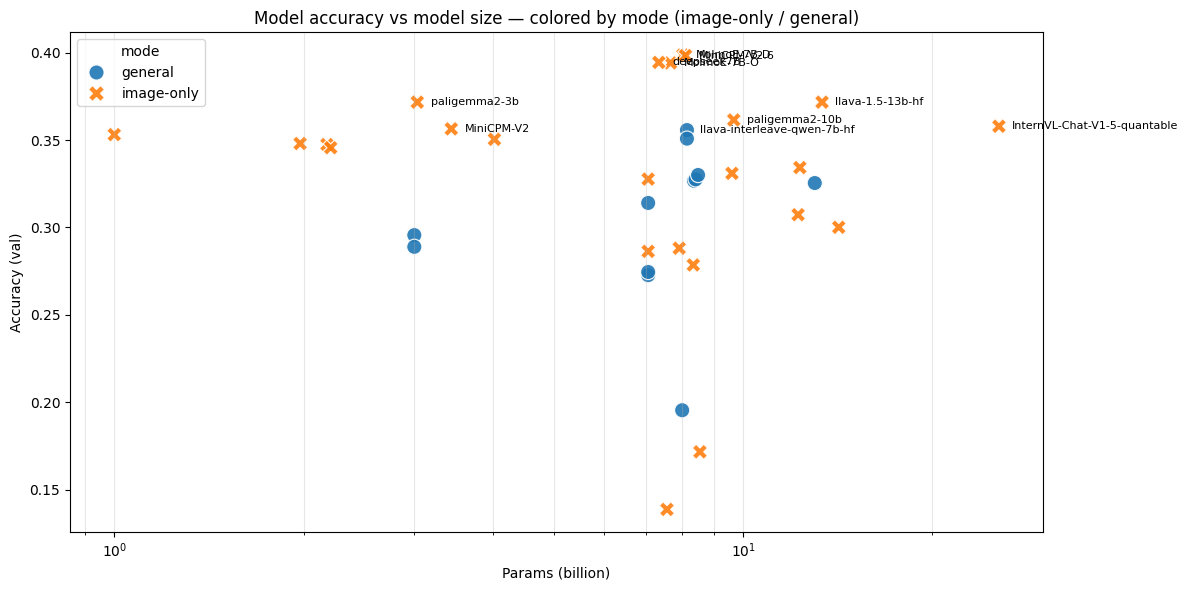

In [6]:
# Uses existing variables: eval_df, models_df

# compute per-model accuracy on validation split
acc_by_model = (
    eval_df[eval_df["split"] == "val"]
    .groupby("model_id")["is_correct"]
    .agg(["mean", "count"])
    .reset_index()
    .rename(columns={"mean": "accuracy", "count": "n"})
)

# merge with model metadata
plot_df = models_df.merge(acc_by_model, on="model_id", how="left")

# basic scatter
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=plot_df,
    x="params_b",
    y="accuracy",
    hue="mode",
    style="mode",
    s=120,
    edgecolor="w",
    alpha=0.9
)

plt.xscale("log")
plt.xlabel("Params (billion)")
plt.ylabel("Accuracy (val)")
plt.title("Model accuracy vs model size — colored by mode (image-only / general)")
plt.grid(alpha=0.3, which="both", axis="x")

# annotate top models (by accuracy) to avoid clutter
annotate_df = plot_df.dropna(subset=["accuracy"]).sort_values("accuracy", ascending=False).head(10)
for _, r in annotate_df.iterrows():
    plt.text(r["params_b"] * 1.05, r["accuracy"], r["model_id"], fontsize=8, va="center")

plt.legend(title="mode")
plt.tight_layout()
plt.show()

In [7]:
# Overall per model params (val only)
acc_overall = summarize_accuracy(eval_df[eval_df["split"]=="val"], by=("model_id","params_b"), sort=("accuracy","n", "params_b"), ascending=(False,False,True))
print(eval_df["params_b"].dtype)

print("Overall accuracy per model params:")
acc_overall.head(40)

Float32
Overall accuracy per model params:


,model_id,params_b,n,correct,accuracy
12,MolmoE-7B-D,8.021026,3339,1331,0.398622
10,MiniCPM-V2.6,8.099175,3339,1330,0.398323
19,deepseek7B,7.34399,3339,1317,0.394429
13,MolmoE-7B-O,7.665032,3339,1316,0.394130
31,paligemma2-3b,3.033127,3339,1241,0.371668
24,llava-1.5-13b-hf,13.351495,3339,1241,0.371668
30,paligemma2-10b,9.663524,3339,1207,0.361485
1,InternVL-Chat-V1-5-quantable,25.514187,3339,1195,0.357892
8,MiniCPM-V2,3.434966,3339,1190,0.356394
27,llava-interleave-qwen-7b-hf,8.141101,10000,3557,0.355700


In [8]:
# Overall per model release year (val only)
acc_overall = summarize_accuracy(eval_df[eval_df["split"]=="val"], by=("model_id","release_year"), sort=("accuracy","n", "release_year"), ascending=(False,False,False))
print(eval_df["release_year"].dtype)

print("Overall accuracy per model:")
acc_overall.head(25)

Int16
Overall accuracy per model:


,model_id,release_year,n,correct,accuracy
12,MolmoE-7B-D,2024,3339,1331,0.398622
10,MiniCPM-V2.6,2024,3339,1330,0.398323
19,deepseek7B,2024,3339,1317,0.394429
13,MolmoE-7B-O,2024,3339,1316,0.394130
31,paligemma2-3b,2024,3339,1241,0.371668
24,llava-1.5-13b-hf,2023,3339,1241,0.371668
30,paligemma2-10b,2024,3339,1207,0.361485
1,InternVL-Chat-V1-5-quantable,2024,3339,1195,0.357892
8,MiniCPM-V2,2024,3339,1190,0.356394
27,llava-interleave-qwen-7b-hf,2024,10000,3557,0.355700


In [9]:
acc_ability = summarize_accuracy(eval_df[eval_df["split"]=="val"], by=("model_id","ability_type","sub_category"))
print("Accuracy per model by ability category:")
acc_ability

Accuracy per model by ability category:


,model_id,ability_type,sub_category,n,correct,accuracy
120,MolmoE-1B,NaN,layout,50,47,0.940000
3,Aquila-VL-2B,NaN,layout,50,45,0.900000
129,MolmoE-7B-D,NaN,layout,50,45,0.900000
203,instructblip-flan-t5-xl,NaN,material_identification,500,423,0.846000
167,blip2-flant5xxl,NaN,material_identification,500,418,0.836000
...,...,...,...,...,...,...
171,cambrian-8b,NaN,camera_characteristics,100,3,0.030000
42,Mantis-8B-Idefics2,NaN,camera_characteristics,200,5,0.025000
54,Mantis-8B-clip-llama3,NaN,camera_characteristics,200,4,0.020000
177,cambrian-8b,NaN,physics_property,750,2,0.002667


In [10]:
# accuracy for each model for each category really
eval_df_heatmap = eval_df[["answer","correct_answer","ability_type","sub_category","model_id","is_correct","split", "question_id"]]

eval_df_heatmap_grouped_sub_type = eval_df_heatmap.groupby(["sub_category", "model_id"]).agg(
    total_questions=("is_correct","count"),
    correct_answers=("is_correct","sum")
).reset_index()

eval_df_heatmap_grouped_sub_type["accuracy"] = eval_df_heatmap_grouped_sub_type["correct_answers"] / eval_df_heatmap_grouped_sub_type["total_questions"]

eval_df_heatmap_grouped_sub_type

/tmp/ipykernel_522974/592193652.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_df_heatmap_grouped_sub_type = eval_df_heatmap.groupby(["sub_category", "model_id"]).agg(


,sub_category,model_id,total_questions,correct_answers,accuracy
0,camera_characteristics,Aquila-VL-2B,100,28,0.280
1,camera_characteristics,InternVL-Chat-V1-5-quantable,100,19,0.190
2,camera_characteristics,LLaVA-NeXT-Video-7B-DPO-hf,200,83,0.415
3,camera_characteristics,LLaVA-NeXT-Video-7B-hf,200,76,0.380
4,camera_characteristics,Mantis-8B-Idefics2,200,5,0.025
...,...,...,...,...,...
427,visibility,paligemma2-3b,250,66,0.264
428,visibility,vila-1.5-13b,500,184,0.368
429,visibility,vila-1.5-3b,500,130,0.260
430,visibility,vila-1.5-3b-s2,500,106,0.212


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Rectangle

def create_graph_from_df(input_df, index_to_use="sub_category", name_graph="heatmap_subcategory_vs_model", title=None, color_by_mode=False, orientation='landscape'):
    g = input_df.copy()
    g["accuracy"] = g["correct_answers"] / g["total_questions"]

      # choose pivot orientation
    if orientation == "landscape":
        acc = g.pivot(index=index_to_use, columns="model_id", values="accuracy").sort_index()
        cnt = g.pivot(index=index_to_use, columns="model_id", values="total_questions").reindex(acc.index)
        x_label, y_label = "model_id", index_to_use
    else:  # portrait: models on rows
        acc = g.pivot(index="model_id", columns=index_to_use, values="accuracy").sort_index()
        cnt = g.pivot(index="model_id", columns=index_to_use, values="total_questions").reindex(acc.index)
        x_label, y_label = index_to_use, "model_id"

    # compute totals
    group_axis = "model_id" if orientation == "landscape" else index_to_use
    total_correct = g.groupby(group_axis)["correct_answers"].sum()
    total_questions = g.groupby(group_axis)["total_questions"].sum()
    total_acc = (total_correct / total_questions).to_frame().T
    total_acc.index = ["Total"]
    total_cnt = total_questions.to_frame().T
    total_cnt.index = ["Total"]

    acc = pd.concat([acc, total_acc])
    cnt = pd.concat([cnt, total_cnt])

    acc = acc.dropna(axis=0, how="all")
    acc = acc.dropna(axis=1, how="all")
    cnt = cnt.reindex(columns=acc.columns)  # keep them in sync

    # averages
    avg_acc = acc.iloc[:-1].mean(axis=1)
    acc.insert(0, "Average", avg_acc)
    acc.loc["Total", "Average"] = acc.loc["Total", acc.columns[1:]].mean()

    avg_cnt = cnt.iloc[:-1].mean(axis=1)
    cnt.insert(0, "Average", avg_cnt)
    cnt.loc["Total", "Average"] = cnt.loc["Total", cnt.columns[1:]].mean()

    # labels
    labels = (acc * 100).round(0).astype("Int64").astype(str) + "%"

    # plot
    plt.figure(figsize=(max(24, 1.2*acc.shape[1] + 2), max(3, 0.45*acc.shape[0] + 1)))
    ax = sns.heatmap(
        acc,
        vmin=0, vmax=1,
        cmap="plasma",
        annot=labels,
        fmt="",
        linewidths=0.5,
        linecolor="white",
        cbar=False,
        cbar_kws={"format": PercentFormatter(xmax=1)}
    )
    if orientation == "landscape":
        ax.set_xlabel("model_id")
        ax.set_ylabel(index_to_use)
    else:
        ax.set_xlabel(index_to_use)
        ax.set_ylabel("model_id")
    if title is not None:
        ax.set_title(title)
    else:
        ax.set_title(f"Accuracy by {index_to_use} and model (average column first, highlighted)")
    plt.yticks(rotation=0)
    # plt.tight_layout()

    if color_by_mode and "mode_y" in g.columns:
        model_mode_map = g[["model_id", "mode_y"]].drop_duplicates().set_index("model_id")["mode_y"]
        mode_colors = {"image-only": "#208A00", "general": "#001C82"}

        # decide which axis to color
        ticklabels = ax.get_xticklabels() if orientation == "landscape" else ax.get_yticklabels()

        for label in ticklabels:
            model = label.get_text()
            if model in model_mode_map:
                label.set_color(mode_colors.get(model_mode_map[model], "black"))

        # add legend (optional)
        handles = [plt.Line2D([0], [0], color=c, lw=4) for c in mode_colors.values()]
        ax.legend(handles, mode_colors.keys(), title="Mode", loc="upper left", bbox_to_anchor=(1.02, 1))

    # ---- Highlight the first column (Average) with a red rectangle ----
    num_rows = len(acc.index)
    num_columns = len(acc.columns)
    # Rectangle(x, y, width, height)
    # x=0 => first column; width=1; height=num_rows; note: seaborn inverts y
    rect_column = Rectangle(
        (0, 0),           # bottom-left corner (column 0)
        1,                # width (1 column)
        num_rows,         # height (all rows)
        fill=False,
        edgecolor="white",
        linewidth=4
    )
    rect_rows = Rectangle(
        (0, num_rows-1),           # bottom-left corner (column 0)
        num_columns,                # width (1 column)
        1,         # height (all rows)
        fill=False,
        edgecolor="white",
        linewidth=4
    )
    ax.add_patch(rect_rows)
    ax.add_patch(rect_column)

    os.makedirs(f"./images/{RUN_NAME}/", exist_ok=True)
    plt.savefig(f"./images/{RUN_NAME}/{name_graph}.png", dpi=300, bbox_inches='tight')

    plt.show()

    

/tmp/ipykernel_522974/2406728701.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_df_heatmap_grouped_sub_type_single_image = eval_df_heatmap_single_image.groupby(["sub_category", "model_id"]).agg(
/tmp/ipykernel_522974/146286500.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_correct = g.groupby(group_axis)["correct_answers"].sum()
/tmp/ipykernel_522974/146286500.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence th

FileNotFoundError: [Errno 2] No such file or directory: './images/run_06_general/heatmap_single_image_models_sub_category.png'

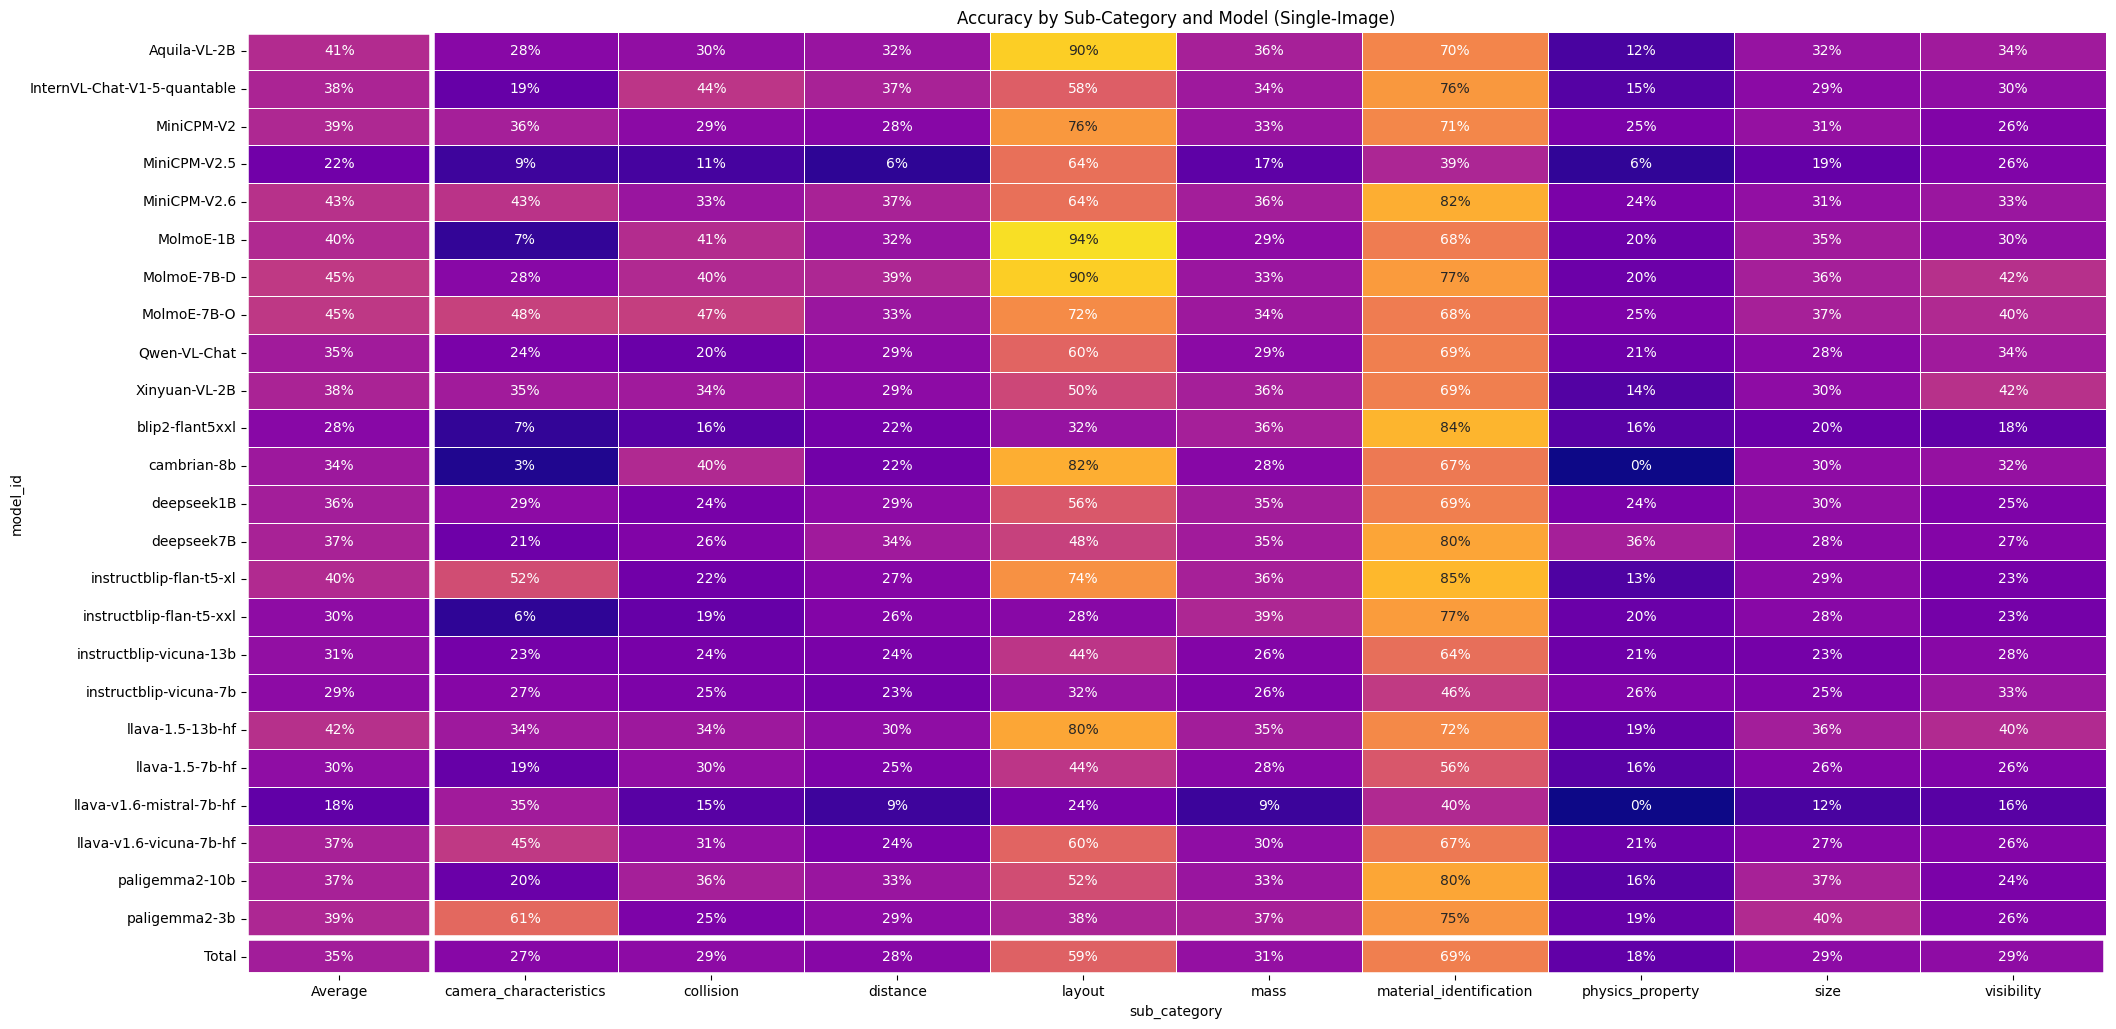

In [14]:
eval_df_heatmap_single_image = eval_df_single_image[["answer","correct_answer","ability_type","sub_category","model_id","is_correct","split", "question_id"]]

eval_df_heatmap_grouped_sub_type_single_image = eval_df_heatmap_single_image.groupby(["sub_category", "model_id"]).agg(
    total_questions=("is_correct","count"),
    correct_answers=("is_correct","sum")
).reset_index()

create_graph_from_df(eval_df_heatmap_grouped_sub_type_single_image, index_to_use="sub_category", name_graph="heatmap_single_image_models_sub_category"\
                     , title="Accuracy by Sub-Category and Model (Single-Image)", orientation='portrait', color_by_mode=True)

/tmp/ipykernel_1812802/1838243745.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_df_heatmap_grouped_sub_type_single_image = eval_df_heatmap_single_image.groupby(["category", "model_id"]).agg(
/tmp/ipykernel_1812802/1498989806.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_correct = g.groupby(group_axis)["correct_answers"].sum()
/tmp/ipykernel_1812802/1498989806.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

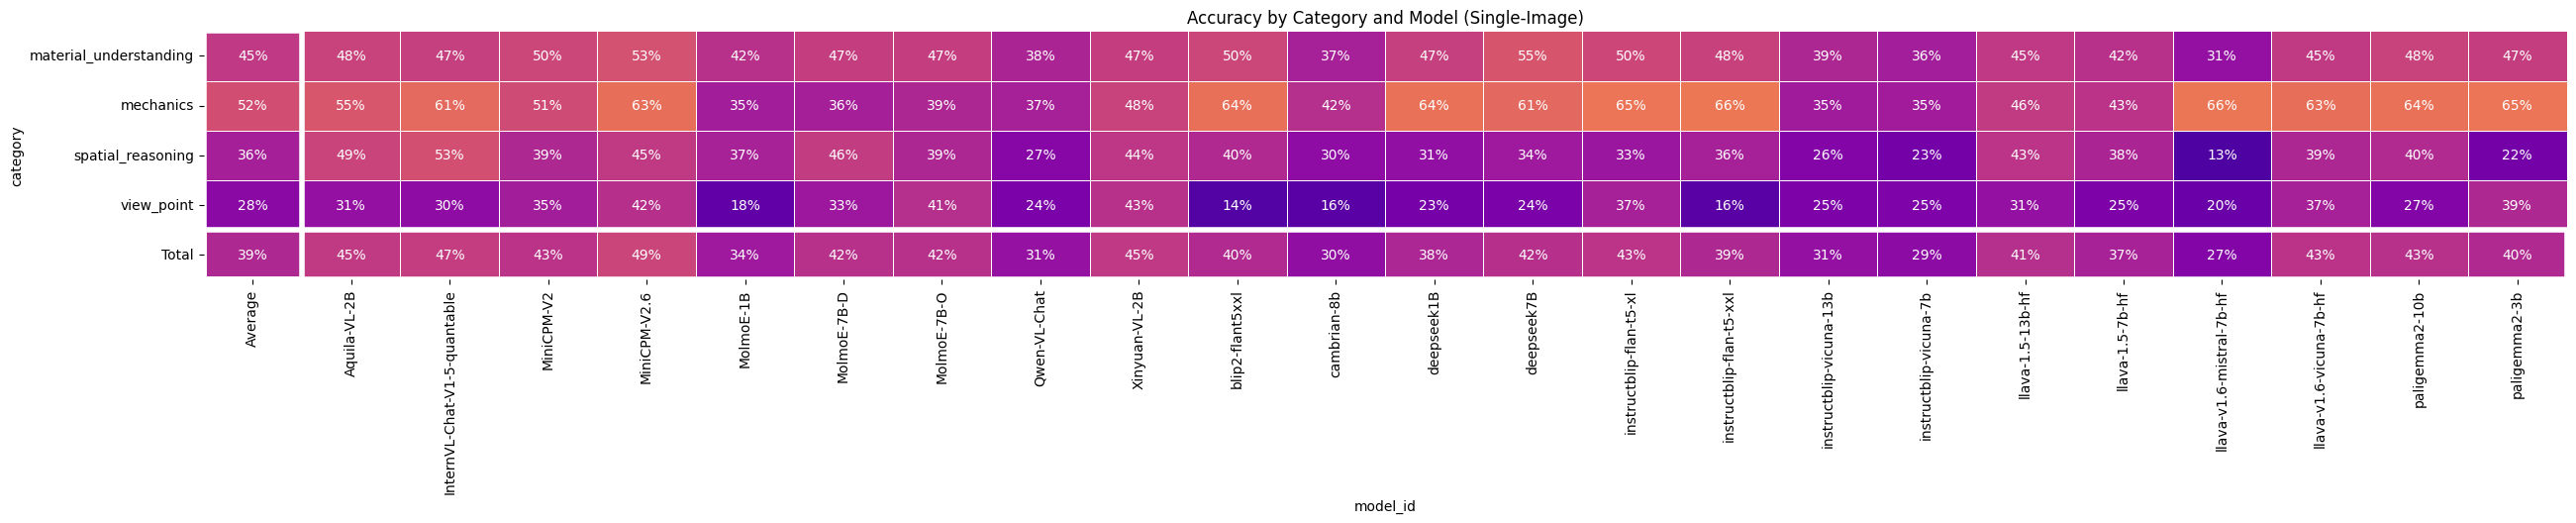

In [ ]:
eval_df_heatmap_single_image = eval_df_single_image[["answer","correct_answer","ability_type","category","sub_category","model_id","is_correct","split", "question_id"]]

eval_df_heatmap_grouped_sub_type_single_image = eval_df_heatmap_single_image.groupby(["category", "model_id"]).agg(
    total_questions=("is_correct","count"),
    correct_answers=("is_correct","sum")
).reset_index()

create_graph_from_df(eval_df_heatmap_grouped_sub_type_single_image, index_to_use="category", name_graph="heatmap_single_image_models_category", title="Accuracy by Category and Model (Single-Image)")

In [111]:
eval_df_heatmap_single_image = eval_df_all_single_images_all_models[["answer","correct_answer","ability_type","sub_category","model_id","is_correct","split", "question_id", "mode_y"]]
eval_df_heatmap_single_image['mode_y']

1            general
3            general
4            general
5            general
7            general
             ...    
335532    image-only
335533    image-only
335534    image-only
335535    image-only
335536    image-only
Name: mode_y, Length: 178512, dtype: object

/tmp/ipykernel_1812802/2529613589.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_df_heatmap_grouped_sub_type_single_image = eval_df_heatmap_single_image.groupby(["sub_category", "model_id"]).agg(
/tmp/ipykernel_1812802/244808272.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_correct = g.groupby(group_axis)["correct_answers"].sum()
/tmp/ipykernel_1812802/244808272.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence

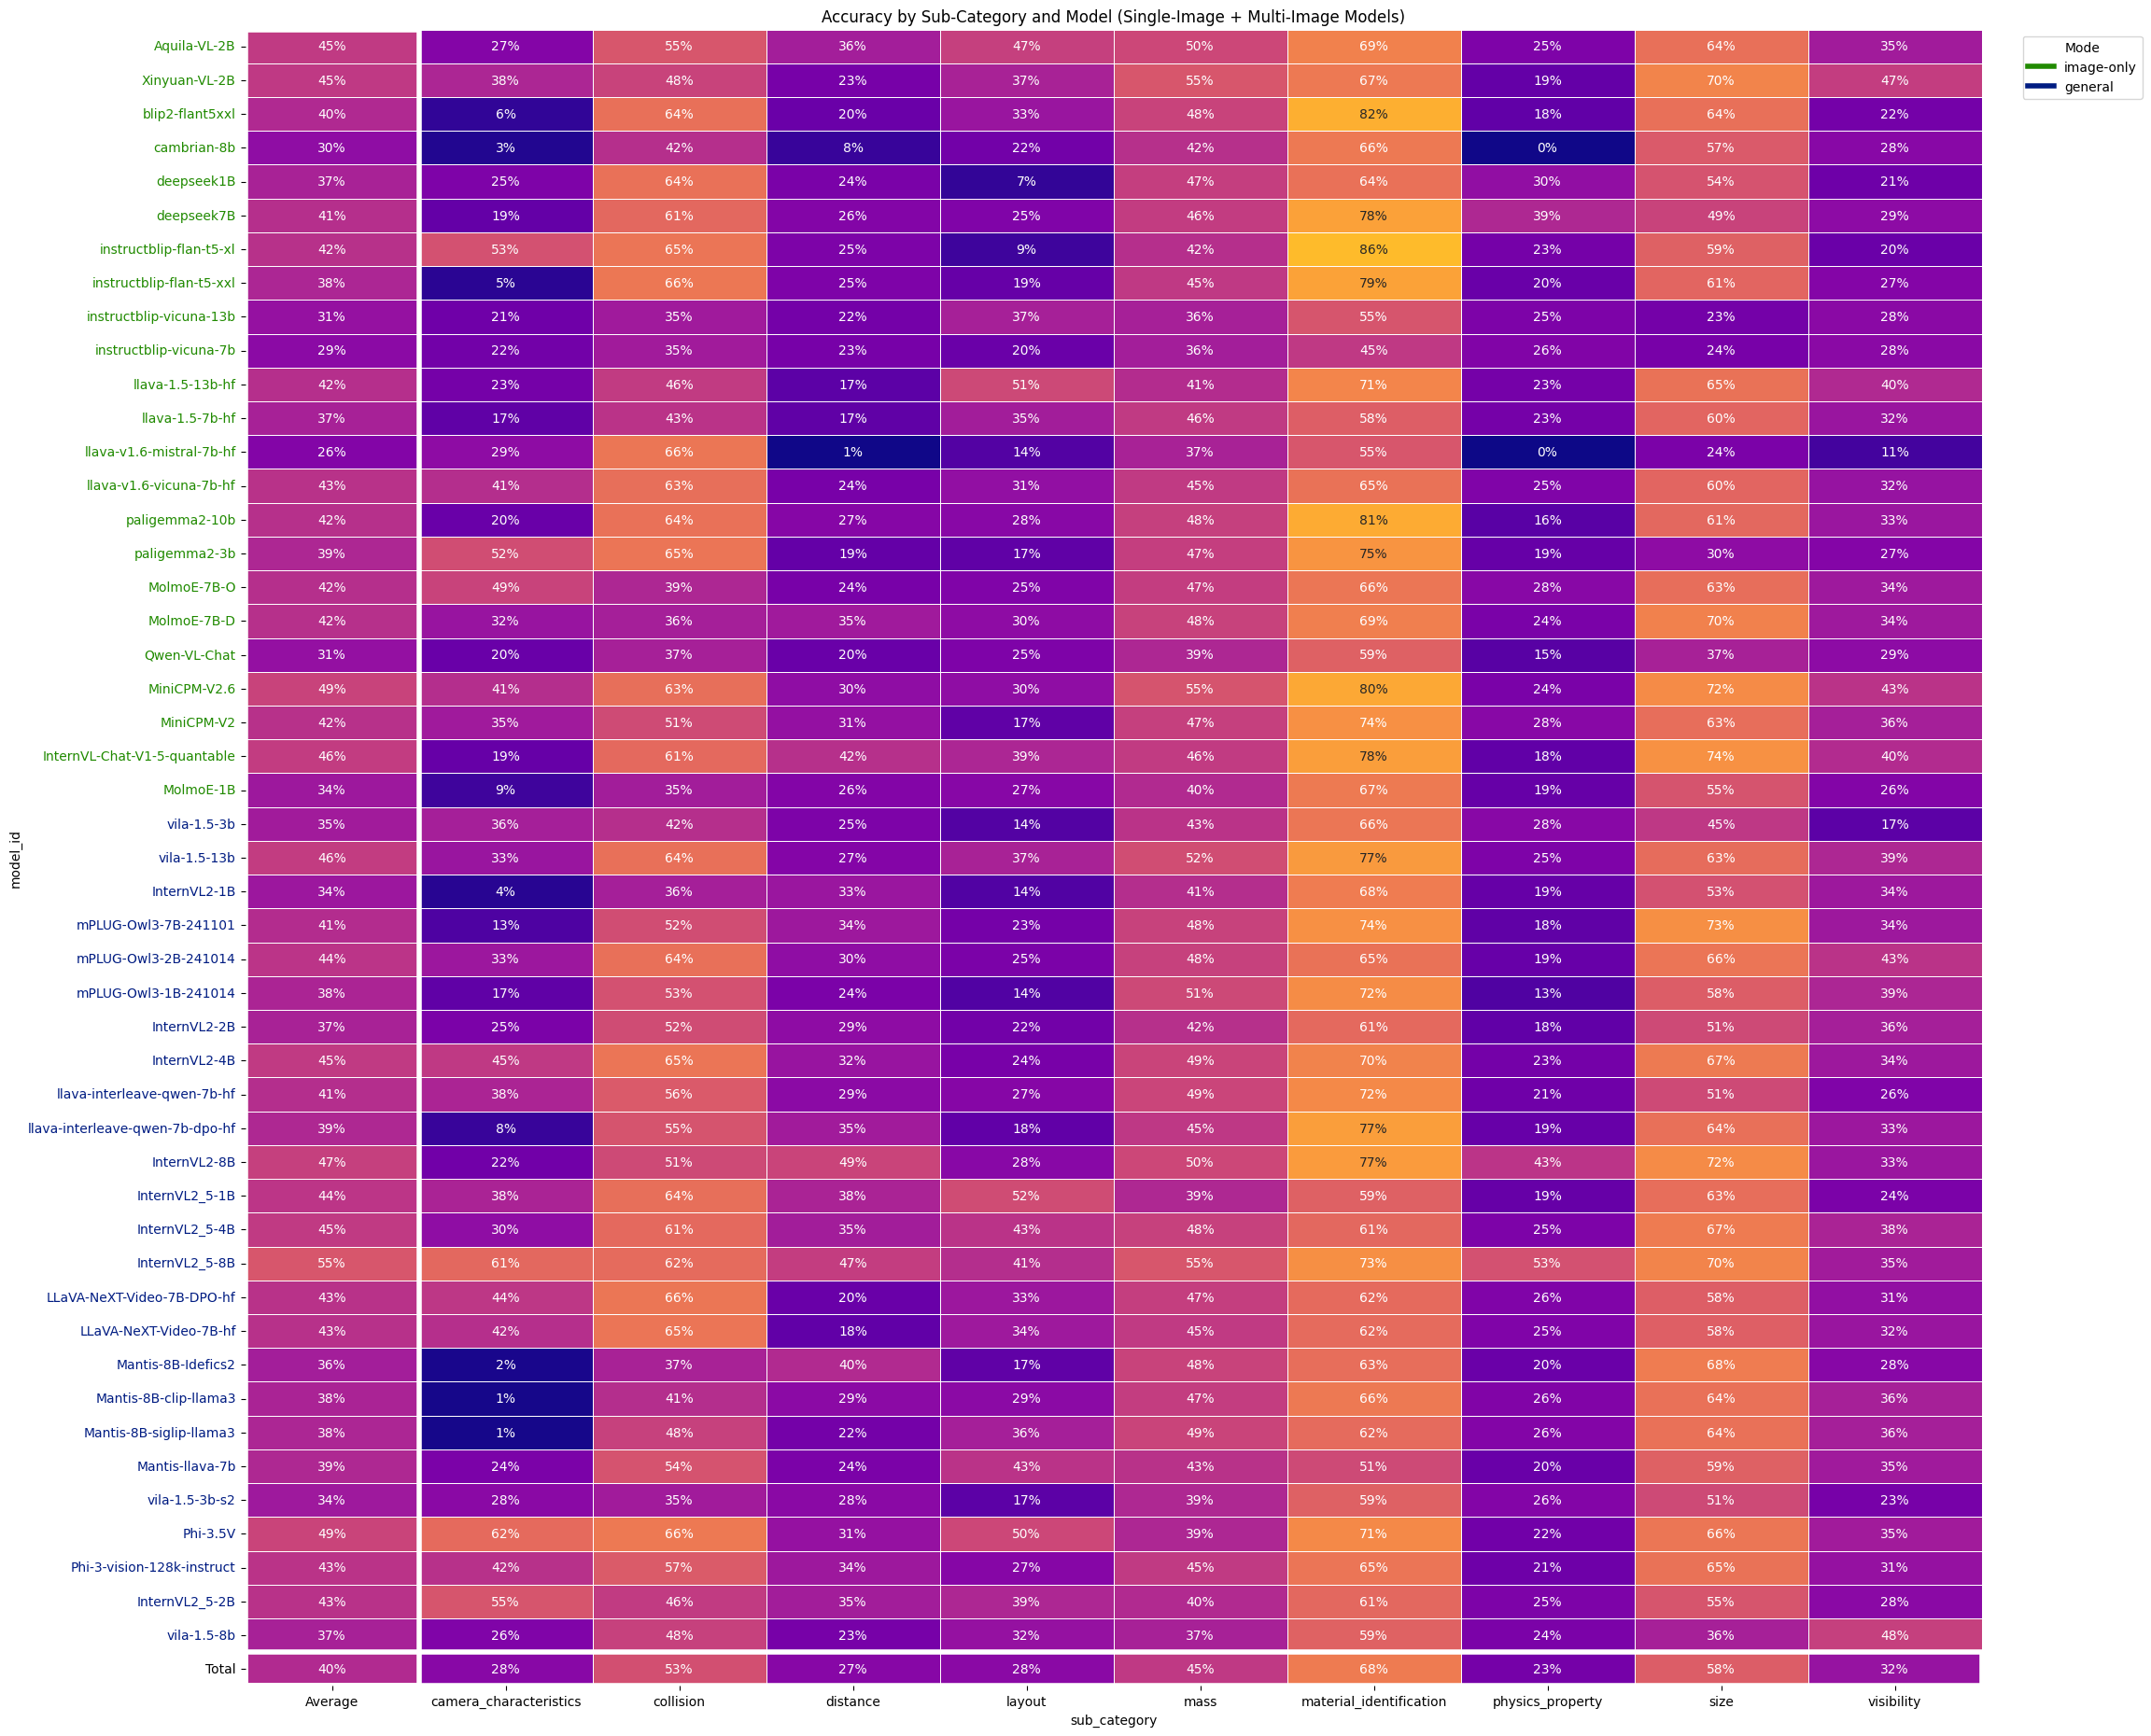

In [ ]:
# this only for image-only models
eval_df_heatmap_single_image = eval_df_all_single_images_all_models[["answer","correct_answer","ability_type","sub_category","model_id","is_correct","split", "question_id", "mode_y"]]

# get mode per model
model_mode_map = eval_df_heatmap_single_image[["model_id", "mode_y"]].drop_duplicates()
model_mode_map = model_mode_map.set_index("model_id")["mode_y"]

eval_df_heatmap_grouped_sub_type_single_image = eval_df_heatmap_single_image.groupby(["sub_category", "model_id"]).agg(
    total_questions=("is_correct","count"),
    correct_answers=("is_correct","sum")
).reset_index()

# assign back
eval_df_heatmap_grouped_sub_type_single_image["mode_y"] = \
    eval_df_heatmap_grouped_sub_type_single_image["model_id"].map(model_mode_map)

# make it categorical with image first
eval_df_heatmap_grouped_sub_type_single_image["mode_y"] = pd.Categorical(
    eval_df_heatmap_grouped_sub_type_single_image["mode_y"],
    categories=["image-only", "general"],
    ordered=True
)

model_order = (
    eval_df_heatmap_grouped_sub_type_single_image
    .drop_duplicates("model_id")
    .sort_values("mode_y", key=lambda x: x.map({"image-only": 0, "general": 1}))
    ["model_id"]
    .tolist()
)

# reorder rows in advance
eval_df_heatmap_grouped_sub_type_single_image["model_id"] = pd.Categorical(
    eval_df_heatmap_grouped_sub_type_single_image["model_id"],
    categories=model_order,
    ordered=True
)

create_graph_from_df(eval_df_heatmap_grouped_sub_type_single_image, index_to_use="sub_category", name_graph="heatmap_single+multi_image_models_sub_category", 
        title="Accuracy by Sub-Category and Model (Single-Image + Multi-Image Models)", color_by_mode=True, orientation='portrait')

In [ ]:
# this only for image-only models NOW FILTERING ALL true_false questions!
eval_df_heatmap_single_image = eval_df_all_single_images_all_models[["answer","correct_answer","ability_type","sub_category","model_id","is_correct","split", "question_id", "mode_y"]]

# get mode per model
model_mode_map = eval_df_heatmap_single_image[["model_id", "mode_y"]].drop_duplicates()
model_mode_map = model_mode_map.set_index("model_id")["mode_y"]

eval_df_heatmap_grouped_sub_type_single_image = eval_df_heatmap_single_image.groupby(["sub_category", "model_id"]).agg(
    total_questions=("is_correct","count"),
    correct_answers=("is_correct","sum")
).reset_index()

# assign back
eval_df_heatmap_grouped_sub_type_single_image["mode_y"] = \
    eval_df_heatmap_grouped_sub_type_single_image["model_id"].map(model_mode_map)

# make it categorical with image first
eval_df_heatmap_grouped_sub_type_single_image["mode_y"] = pd.Categorical(
    eval_df_heatmap_grouped_sub_type_single_image["mode_y"],
    categories=["image-only", "general"],
    ordered=True
)

model_order = (
    eval_df_heatmap_grouped_sub_type_single_image
    .drop_duplicates("model_id")
    .sort_values("mode_y", key=lambda x: x.map({"image-only": 0, "general": 1}))
    ["model_id"]
    .tolist()
)

# reorder rows in advance
eval_df_heatmap_grouped_sub_type_single_image["model_id"] = pd.Categorical(
    eval_df_heatmap_grouped_sub_type_single_image["model_id"],
    categories=model_order,
    ordered=True
)

create_graph_from_df(eval_df_heatmap_grouped_sub_type_single_image, index_to_use="sub_category", name_graph="heatmap_single+multi_image_models_sub_category", 
        title="Accuracy by Sub-Category and Model (Single-Image + Multi-Image Models)", color_by_mode=True, orientation='portrait')

/tmp/ipykernel_1812802/1398103187.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_df_heatmap_grouped_sub_type_single_image = eval_df_heatmap_single_image.groupby(["category", "model_id"]).agg(
/tmp/ipykernel_1812802/1498989806.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_correct = g.groupby(group_axis)["correct_answers"].sum()
/tmp/ipykernel_1812802/1498989806.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

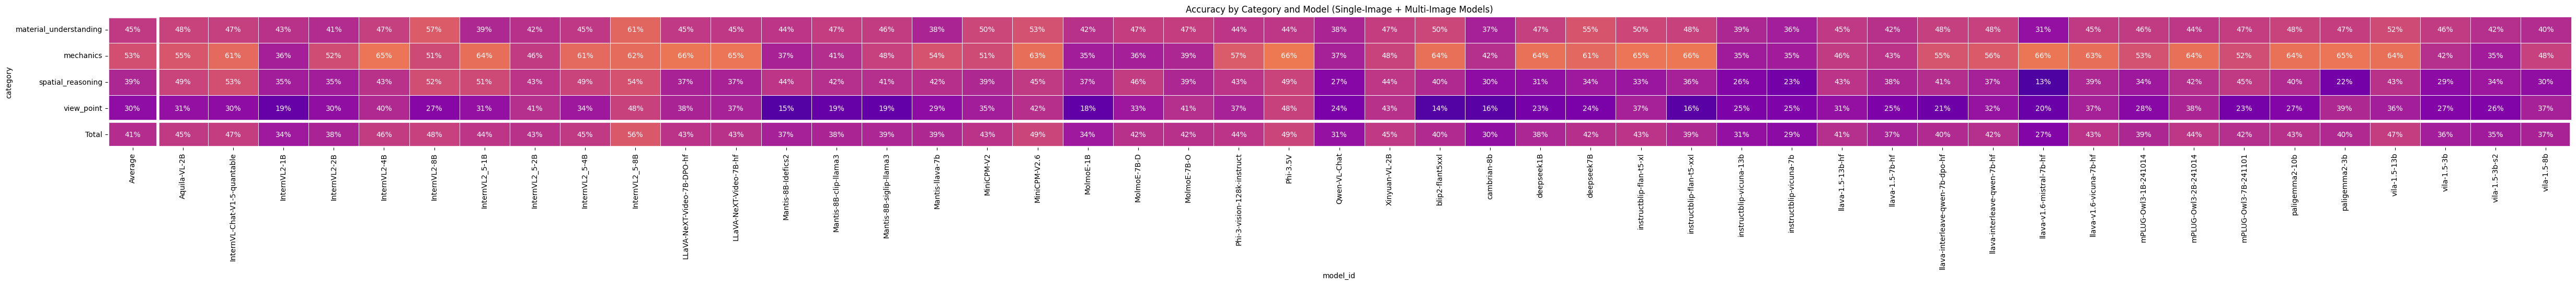

In [113]:
# this only for image-only models

eval_df_heatmap_single_image = eval_df_all_single_images_all_models[["answer","correct_answer","ability_type", "category", "sub_category","model_id","is_correct","split", "question_id"]]

eval_df_heatmap_grouped_sub_type_single_image = eval_df_heatmap_single_image.groupby(["category", "model_id"]).agg(
    total_questions=("is_correct","count"),
    correct_answers=("is_correct","sum")
).reset_index()

create_graph_from_df(eval_df_heatmap_grouped_sub_type_single_image, index_to_use="category", name_graph="heatmap_single+multi_image_models_category", title="Accuracy by Category and Model (Single-Image + Multi-Image Models)")


/tmp/ipykernel_1812802/1727870189.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_df_heatmap_grouped_sub_type_multi_image = eval_df_heatmap_multi_image.groupby(["sub_category", "model_id"]).agg(
/tmp/ipykernel_1812802/244808272.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_correct = g.groupby(group_axis)["correct_answers"].sum()
/tmp/ipykernel_1812802/244808272.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

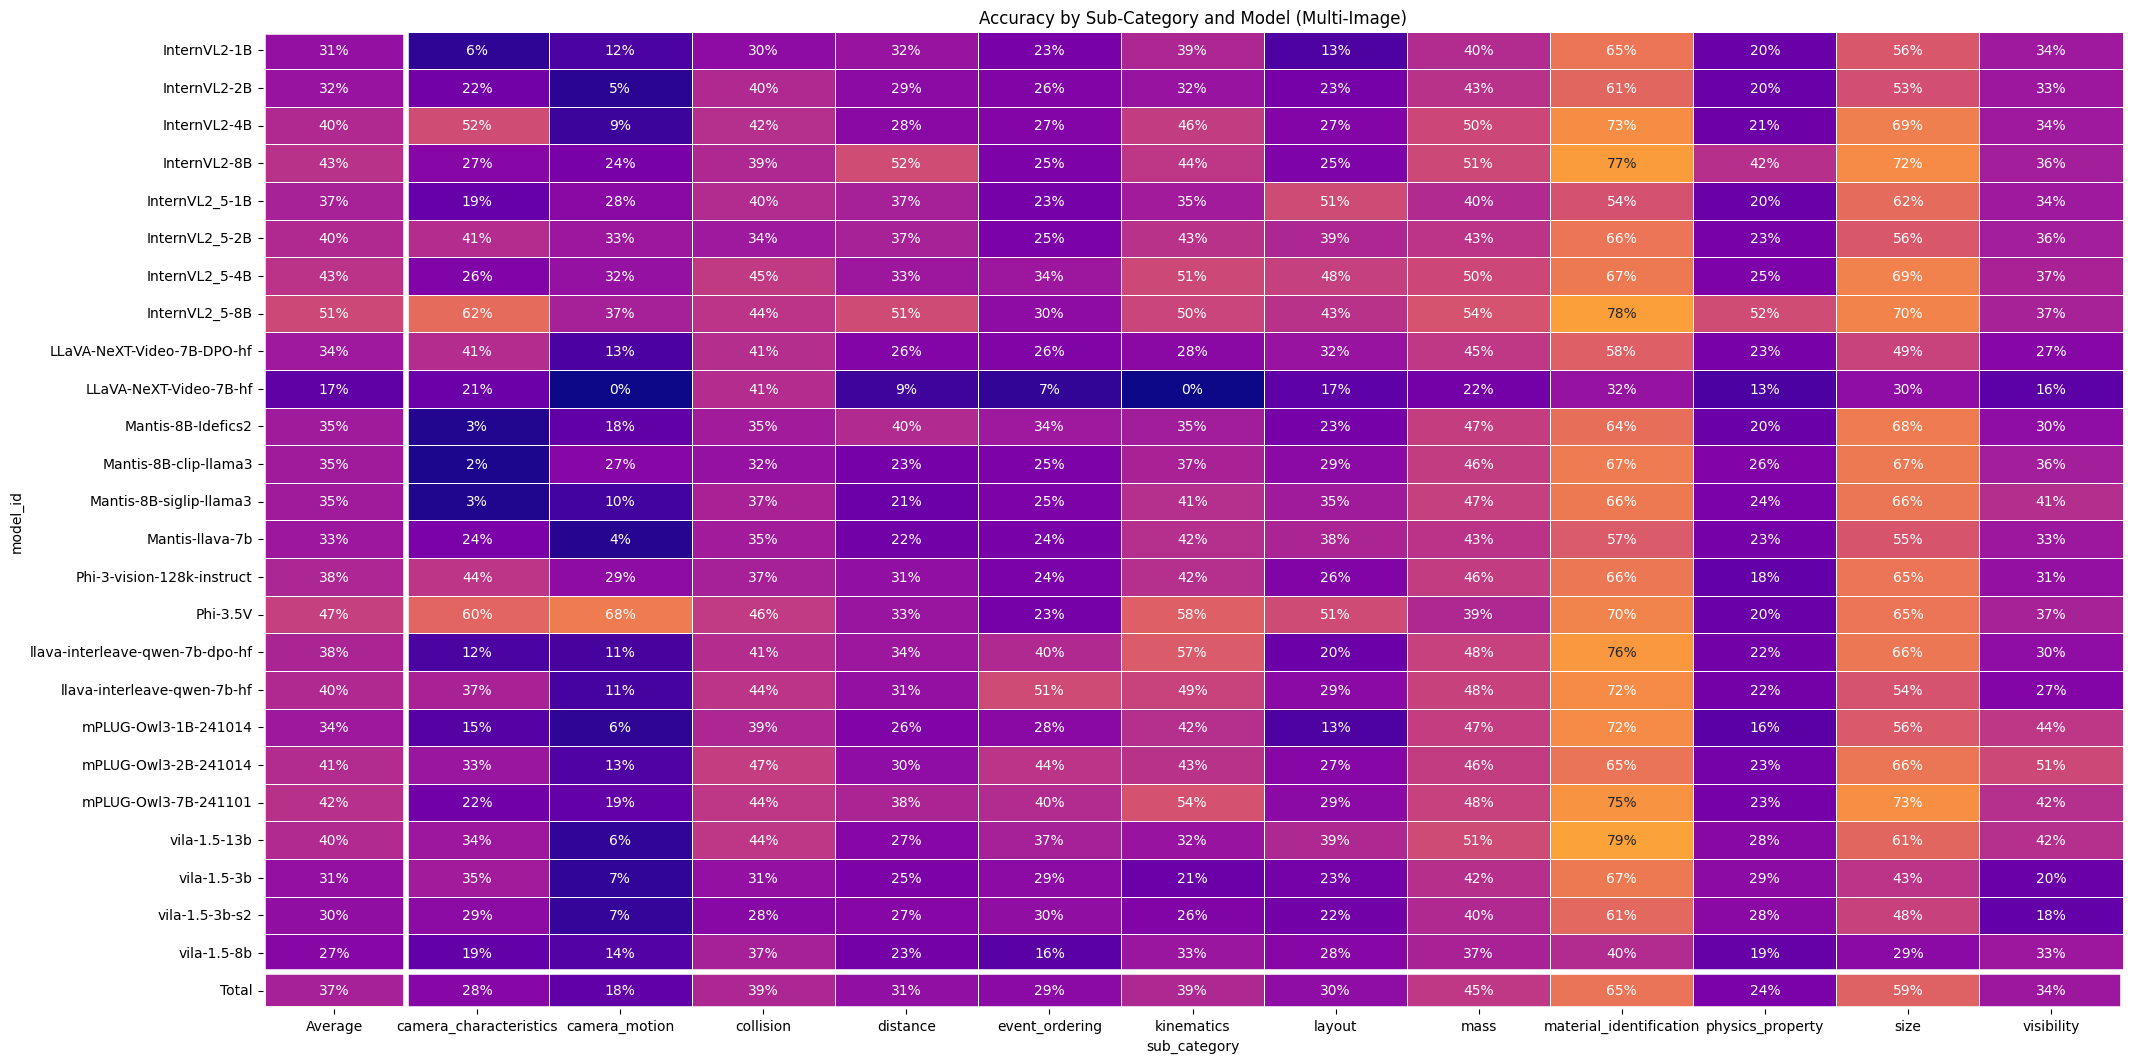

In [124]:
# this only for image-only models

eval_df_heatmap_multi_image = eval_df_multi_image[["answer","correct_answer","ability_type", "category", "sub_category","model_id","is_correct","split", "question_id"]]

eval_df_heatmap_grouped_sub_type_multi_image = eval_df_heatmap_multi_image.groupby(["sub_category", "model_id"]).agg(
    total_questions=("is_correct","count"),
    correct_answers=("is_correct","sum")
).reset_index()

create_graph_from_df(eval_df_heatmap_grouped_sub_type_multi_image, index_to_use="sub_category", name_graph="heatmap_multi_image_models_sub_category", \
        title="Accuracy by Sub-Category and Model (Multi-Image)", orientation='portrait')


/tmp/ipykernel_1812802/593139946.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_df_heatmap_grouped_sub_type_multi_image = eval_df_heatmap_multi_image.groupby(["category", "model_id"]).agg(
/tmp/ipykernel_1812802/1498989806.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_correct = g.groupby(group_axis)["correct_answers"].sum()
/tmp/ipykernel_1812802/1498989806.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

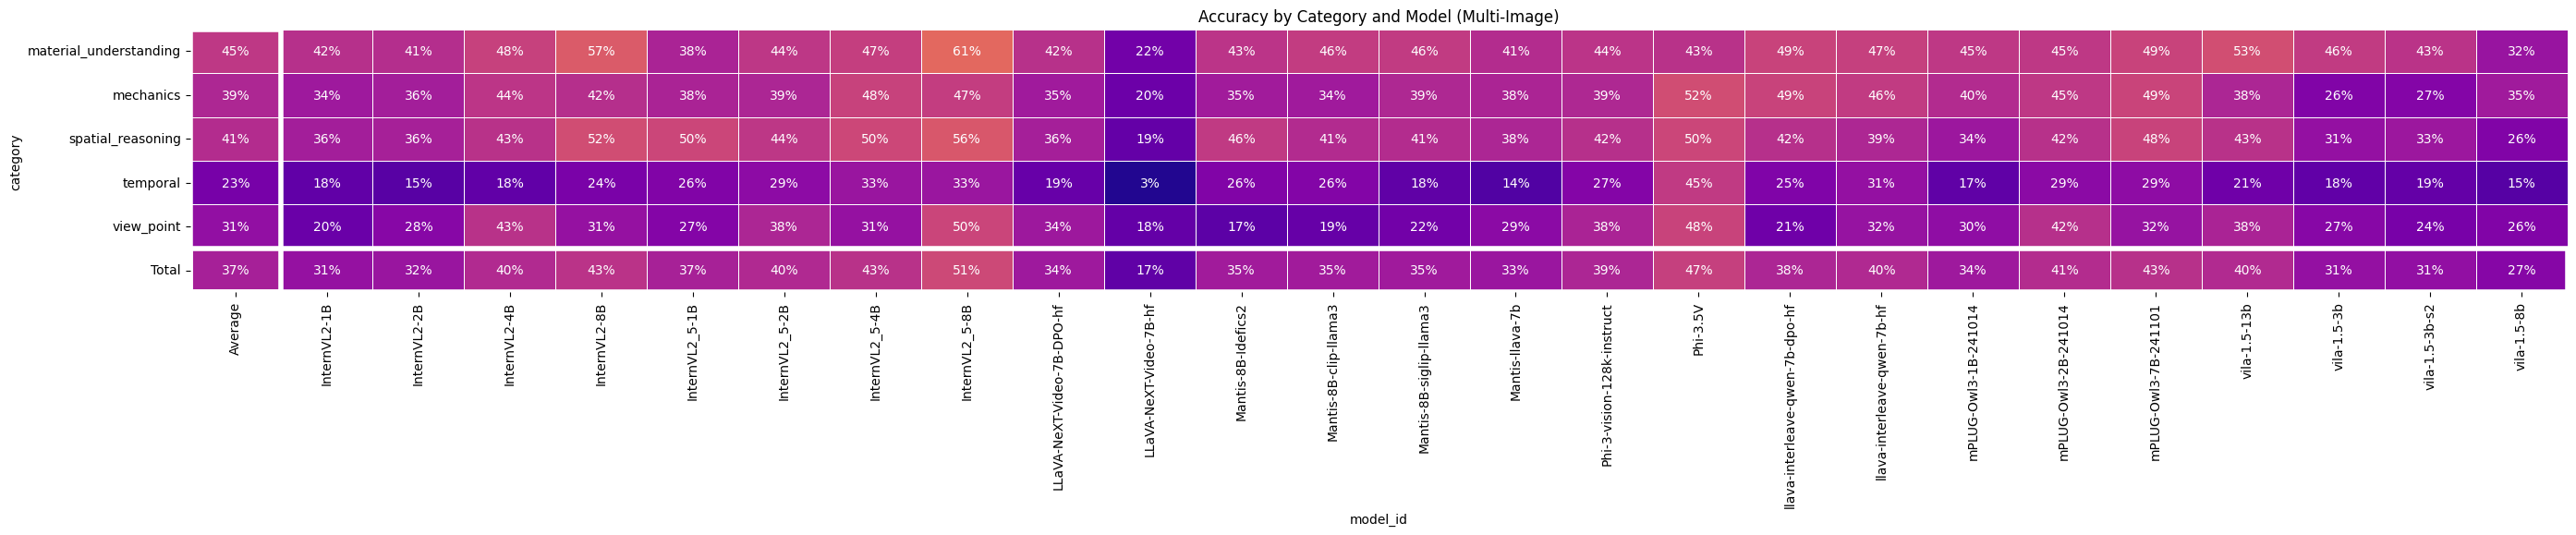

In [115]:

eval_df_heatmap_multi_image = eval_df_multi_image[["answer","correct_answer","ability_type","sub_category","category", "model_id","is_correct","split", "question_id"]]

eval_df_heatmap_grouped_sub_type_multi_image = eval_df_heatmap_multi_image.groupby(["category", "model_id"]).agg(
    total_questions=("is_correct","count"),
    correct_answers=("is_correct","sum")
).reset_index()

create_graph_from_df(eval_df_heatmap_grouped_sub_type_multi_image, index_to_use="category", name_graph="heatmap_multi_image_models_category", title="Accuracy by Category and Model (Multi-Image)")


In [116]:
# accuracy for each model for each category really
eval_df_heatmap = eval_df[["answer","correct_answer","ability_type","sub_category","model_id","is_correct","split", "question_id"]]

print(eval_df_heatmap.columns)

eval_df_heatmap_grouped_question_id = eval_df_heatmap.groupby(["question_id", "model_id"]).agg(
    total_questions=("is_correct","count"),
    correct_answers=("is_correct","sum")
).reset_index()

eval_df_heatmap_grouped_question_id["accuracy"] = eval_df_heatmap_grouped_question_id["correct_answers"] / eval_df_heatmap_grouped_question_id["total_questions"]

eval_df_heatmap_grouped_question_id

Index(['answer', 'correct_answer', 'ability_type', 'sub_category', 'model_id',
       'is_correct', 'split', 'question_id'],
      dtype='object')


/tmp/ipykernel_1812802/524654292.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_df_heatmap_grouped_question_id = eval_df_heatmap.groupby(["question_id", "model_id"]).agg(


,question_id,model_id,total_questions,correct_answers,accuracy
0,F_CAMERA_MOTION_DIRECTION,Aquila-VL-2B,0,0,NaN
1,F_CAMERA_MOTION_DIRECTION,InternVL-Chat-V1-5-quantable,0,0,NaN
2,F_CAMERA_MOTION_DIRECTION,InternVL2-1B,424,92,0.216981
3,F_CAMERA_MOTION_DIRECTION,InternVL2-2B,424,40,0.094340
4,F_CAMERA_MOTION_DIRECTION,InternVL2-4B,424,50,0.117925
...,...,...,...,...,...
1627,F_VISIBILITY_PERCENTAGE_OBJECT,paligemma2-3b,340,74,0.217647
1628,F_VISIBILITY_PERCENTAGE_OBJECT,vila-1.5-13b,670,261,0.389552
1629,F_VISIBILITY_PERCENTAGE_OBJECT,vila-1.5-3b,670,83,0.123881
1630,F_VISIBILITY_PERCENTAGE_OBJECT,vila-1.5-3b-s2,670,68,0.101493


/tmp/ipykernel_1812802/1865218171.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_correct = g.groupby("model_id")["correct_answers"].sum()
/tmp/ipykernel_1812802/1865218171.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_questions = g.groupby("model_id")["total_questions"].sum()


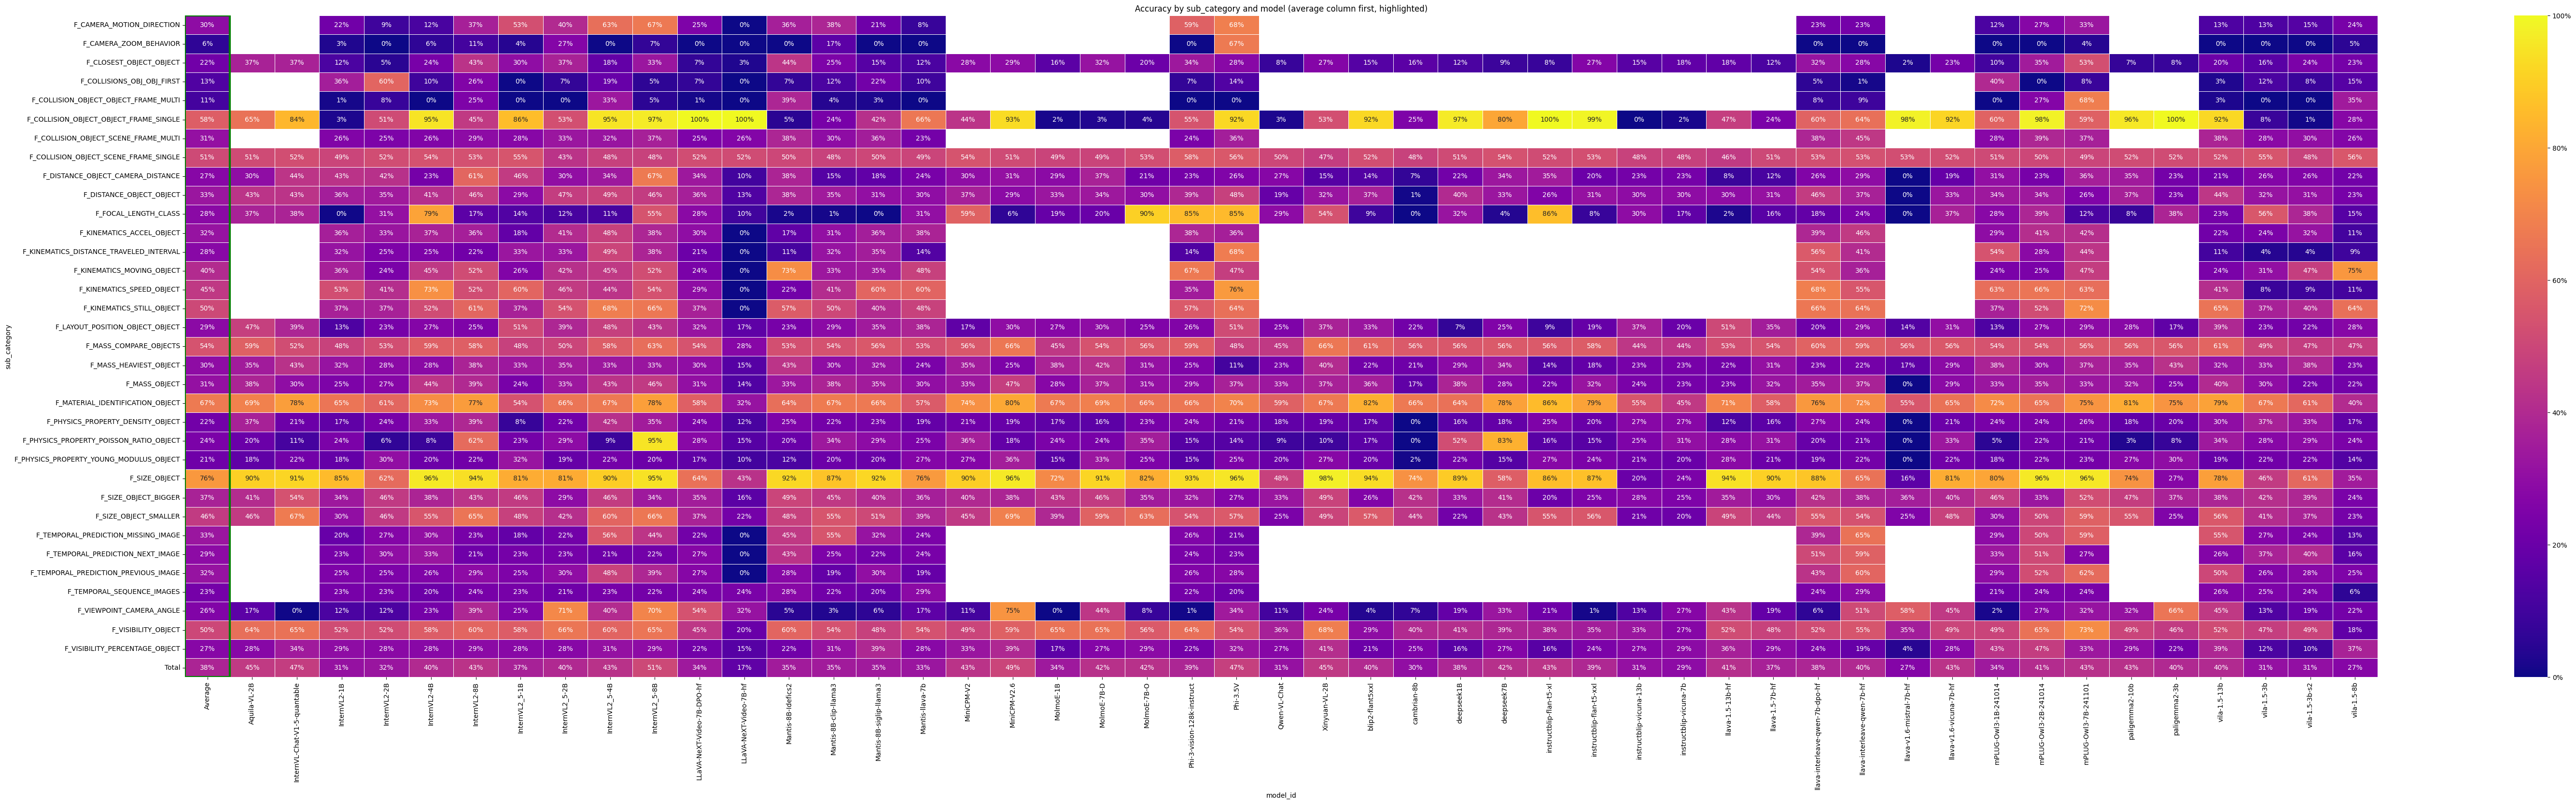

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Rectangle

g = eval_df_heatmap_grouped_question_id.copy()
g["accuracy"] = g["correct_answers"] / g["total_questions"]

# pivot
acc = g.pivot(index="question_id", columns="model_id", values="accuracy").sort_index()
cnt = g.pivot(index="question_id", columns="model_id", values="total_questions").reindex(acc.index)

# ---- Add totals per model (bottom row) ----
total_correct = g.groupby("model_id")["correct_answers"].sum()
total_questions = g.groupby("model_id")["total_questions"].sum()
total_acc = (total_correct / total_questions).to_frame().T
total_acc.index = ["Total"]
total_cnt = total_questions.to_frame().T
total_cnt.index = ["Total"]

acc = pd.concat([acc, total_acc])
cnt = pd.concat([cnt, total_cnt])

# ---- Add average column (first) ----
avg_acc = acc.mean(axis=1).rename("Average")
acc.insert(0, "Average", avg_acc)

avg_cnt = cnt.mean(axis=1).rename("Average")
cnt.insert(0, "Average", avg_cnt)

# ---- Average for Total row ----
acc.loc["Total", "Average"] = acc.loc["Total", acc.columns[1:]].mean()

# labels
labels = (acc * 100).round(0).astype("Int64").astype(str) + "%"

# plot
plt.figure(figsize=(max(6, 1.2*acc.shape[1] + 2), max(3, 0.45*acc.shape[0] + 1)))
ax = sns.heatmap(
    acc,
    vmin=0, vmax=1,
    cmap="plasma",
    annot=labels,
    fmt="",
    linewidths=0.5,
    linecolor="white",
    cbar=True,
    cbar_kws={"format": PercentFormatter(xmax=1)}
)
ax.set_xlabel("model_id")
ax.set_ylabel("sub_category")
ax.set_title("Accuracy by sub_category and model (average column first, highlighted)")
plt.yticks(rotation=0)
plt.tight_layout()

# ---- Highlight the first column (Average) with a red rectangle ----
num_rows = len(acc.index)
# Rectangle(x, y, width, height)
# x=0 => first column; width=1; height=num_rows; note: seaborn inverts y
rect = Rectangle(
    (0, 0),           # bottom-left corner (column 0)
    1,                # width (1 column)
    num_rows,         # height (all rows)
    fill=False,
    edgecolor="green",
    linewidth=3
)
ax.add_patch(rect)

plt.show()
